In [9]:
import pandas as pd

df = pd.read_csv('../data/student-mat.csv', sep=';')
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [10]:
# 1️⃣ Check basic info
df.info()

# 2️⃣ Quick stats for numeric columns
df.describe()

# 3️⃣ Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [11]:
df.columns


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

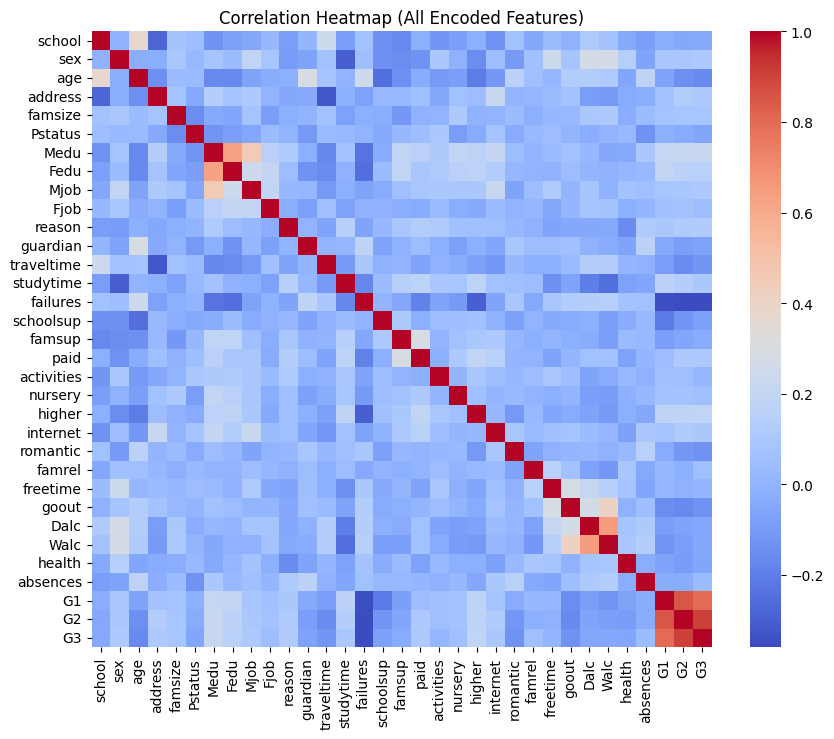

In [13]:
from sklearn.preprocessing import LabelEncoder

encoded_df = df.copy()
for col in encoded_df.select_dtypes(include=['object']).columns:
    encoded_df[col] = LabelEncoder().fit_transform(encoded_df[col])

plt.figure(figsize=(10,8))
sns.heatmap(encoded_df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap (All Encoded Features)')
plt.show()


In [14]:
# Check categorical columns
cat_cols = df.select_dtypes(exclude=['number']).columns
print("Categorical Columns:", list(cat_cols))

# Display value counts for the first few categorical columns
for col in cat_cols[:5]:
    print(f"\n--- {col} ---")
    print(df[col].value_counts())


Categorical Columns: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

--- school ---
school
GP    349
MS     46
Name: count, dtype: int64

--- sex ---
sex
F    208
M    187
Name: count, dtype: int64

--- address ---
address
U    307
R     88
Name: count, dtype: int64

--- famsize ---
famsize
GT3    281
LE3    114
Name: count, dtype: int64

--- Pstatus ---
Pstatus
T    354
A     41
Name: count, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_10888\3732986437.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
C:\Users\User\AppData\Local\Temp\ipykernel_10888\3732986437.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
C:\Users\User\AppData\Local\Temp\ipykernel_10888\3732986437.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
C:\Users\User\AppData\Local\Temp\ipykernel_10888\3732986437.py:7: FutureWarning: 

Passing `palette`

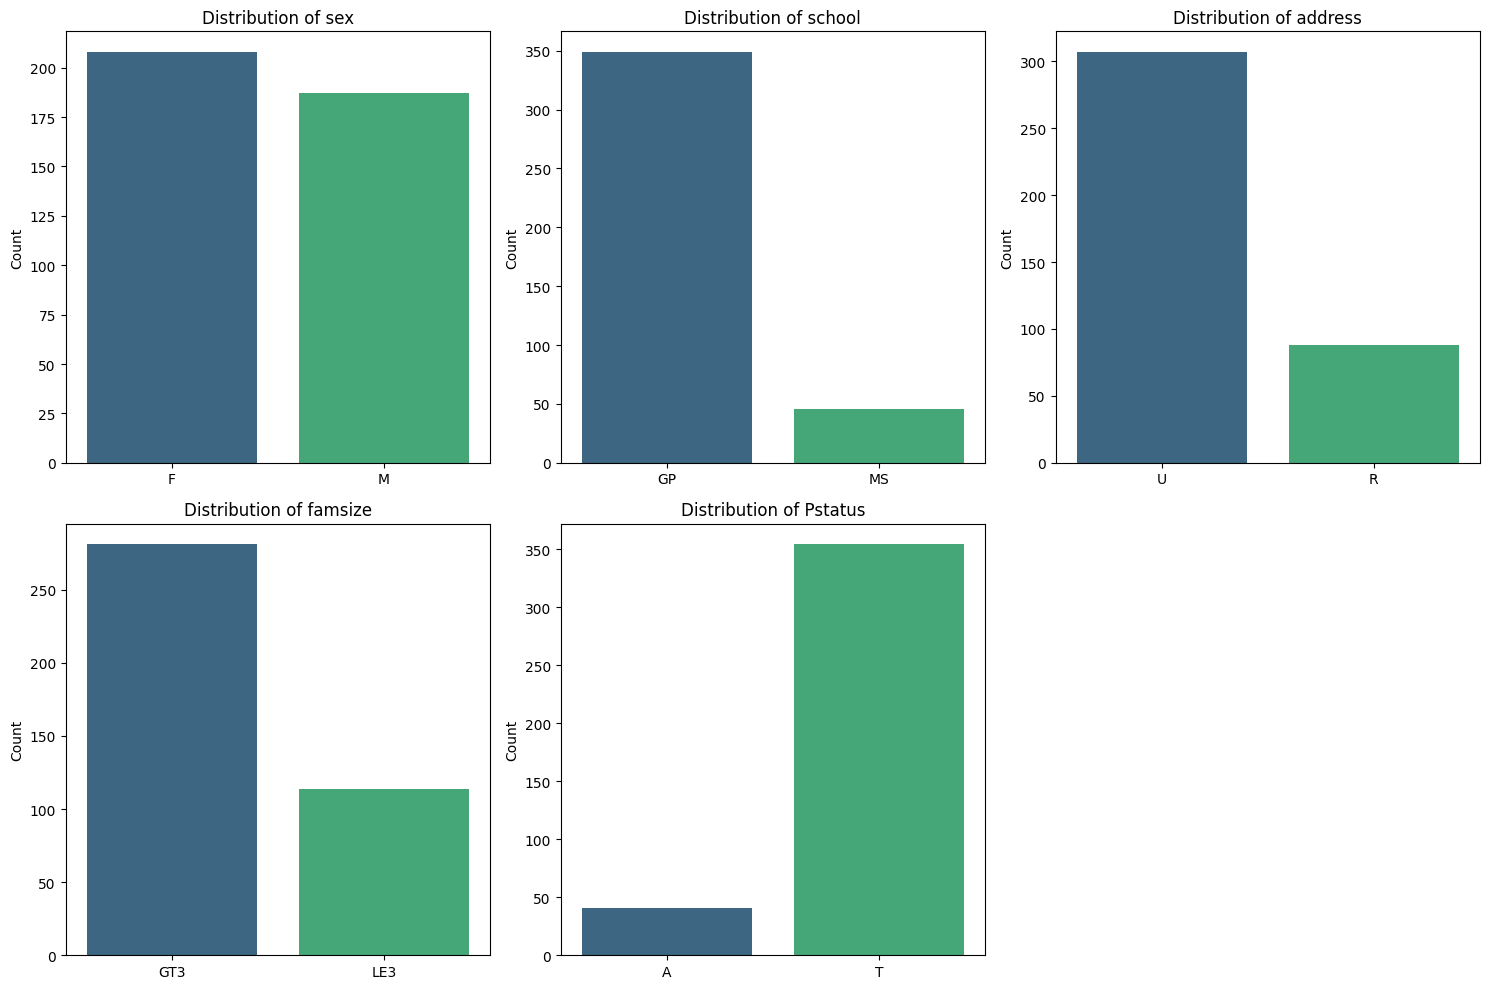

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
for i, col in enumerate(['sex', 'school', 'address', 'famsize', 'Pstatus']):
    plt.subplot(2, 3, i+1)
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f"Distribution of {col}")
    plt.xlabel('')
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [16]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False).head(10)


school     0
sex        0
age        0
address    0
famsize    0
Pstatus    0
Medu       0
Fedu       0
Mjob       0
Fjob       0
dtype: int64

In [17]:
df.describe()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [18]:
# Select numeric columns only
num_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation with target
corr_with_G3 = num_df.corr()['G3'].sort_values(ascending=False)
corr_with_G3


G3            1.000000
G2            0.904868
G1            0.801468
Medu          0.217147
Fedu          0.152457
studytime     0.097820
famrel        0.051363
absences      0.034247
freetime      0.011307
Walc         -0.051939
Dalc         -0.054660
health       -0.061335
traveltime   -0.117142
goout        -0.132791
age          -0.161579
failures     -0.360415
Name: G3, dtype: float64

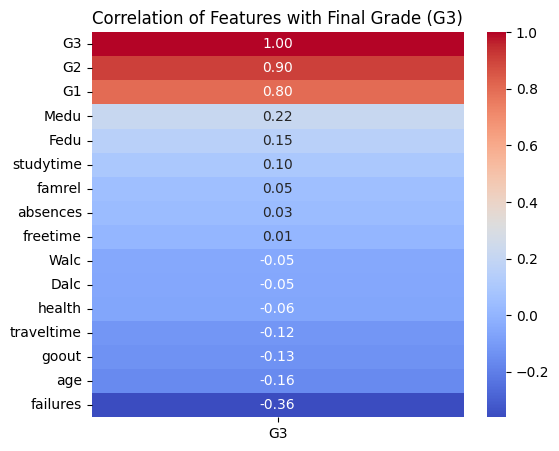

In [19]:
plt.figure(figsize=(6,5))
sns.heatmap(num_df.corr()[['G3']].sort_values(by='G3', ascending=False),
            annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation of Features with Final Grade (G3)')
plt.show()


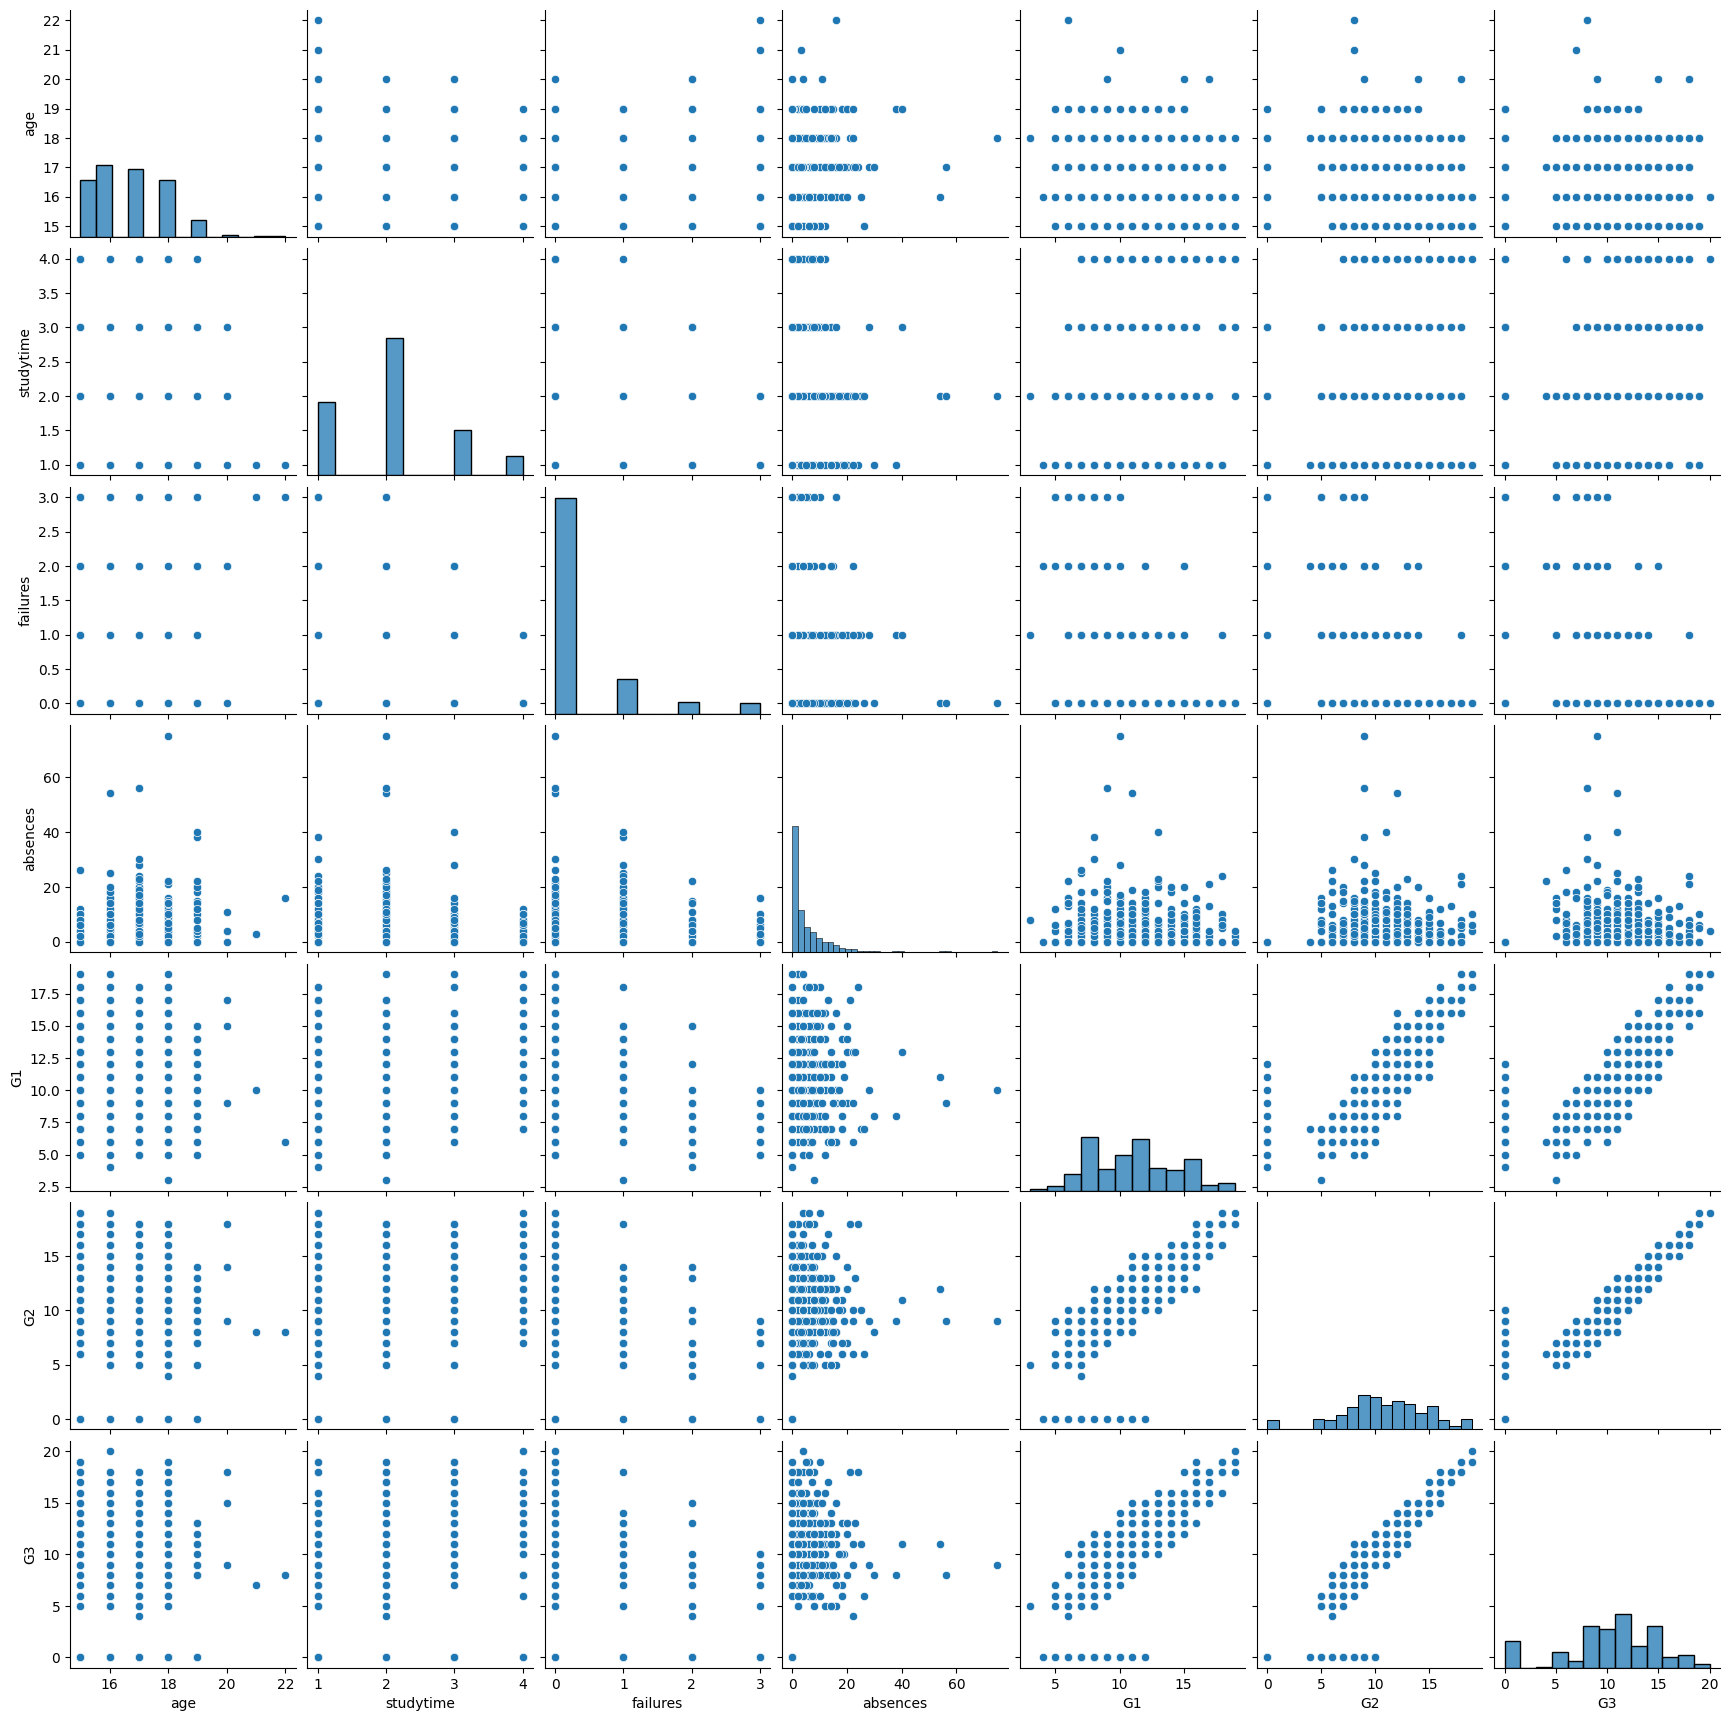

In [20]:
# 1️⃣ Summary statistics
df.describe()

# 2️⃣ Pairplot for some key features
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[['age', 'studytime', 'failures', 'absences', 'G1', 'G2', 'G3']])
plt.show()


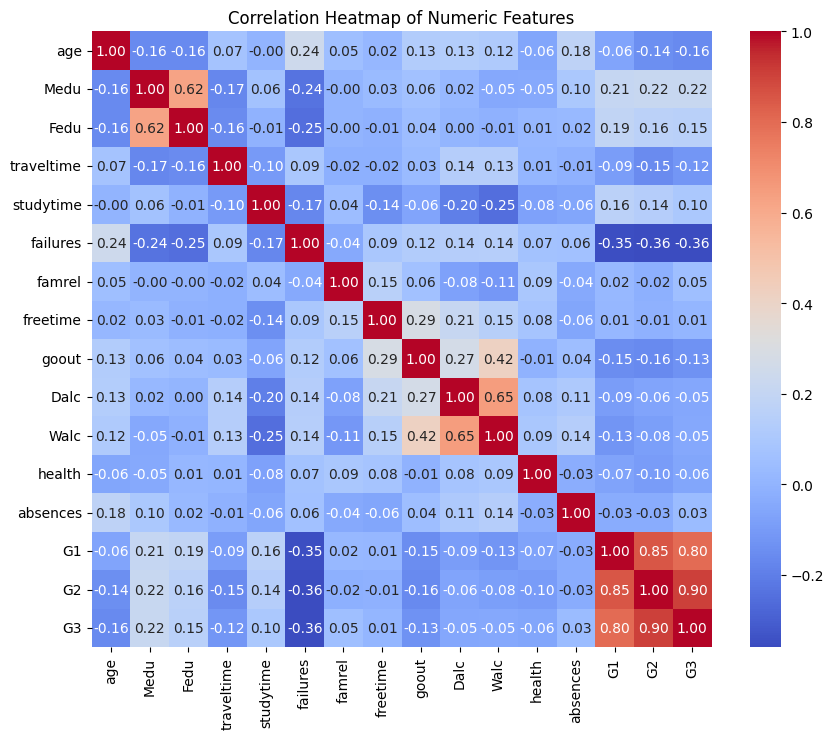

In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=np.number)

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_10888\195089807.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='studytime', y='G3', data=df, palette='viridis')


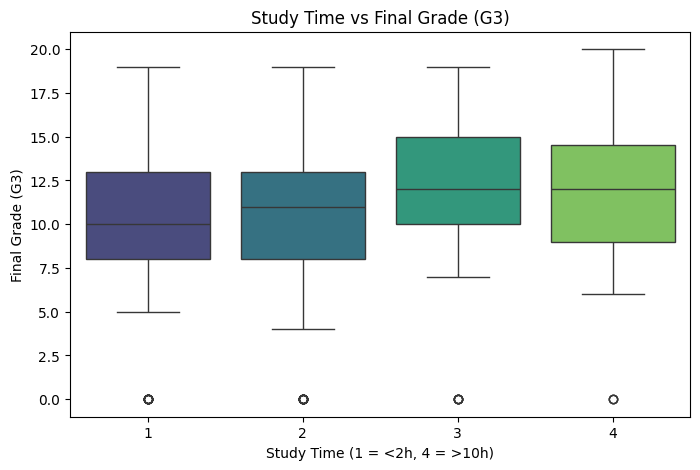

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x='studytime', y='G3', data=df, palette='viridis')
plt.title('Study Time vs Final Grade (G3)')
plt.xlabel('Study Time (1 = <2h, 4 = >10h)')
plt.ylabel('Final Grade (G3)')
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_10888\8197770.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='failures', y='G3', data=df, palette='coolwarm')


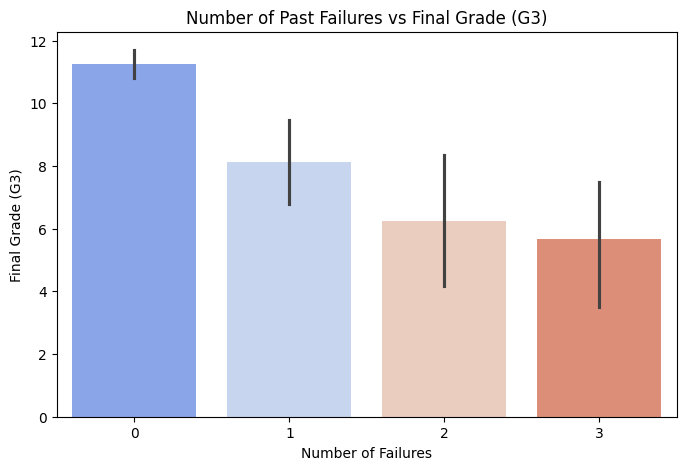

In [23]:
plt.figure(figsize=(8,5))
sns.barplot(x='failures', y='G3', data=df, palette='coolwarm')
plt.title('Number of Past Failures vs Final Grade (G3)')
plt.xlabel('Number of Failures')
plt.ylabel('Final Grade (G3)')
plt.show()


In [ ]:
### Summary of Findings (Day 2)
- Dataset contains 395 rows and 33 features with no missing values.
- Categorical features include gender, school, address, and others; numerical ones include grades, study time, and absences.
- The data is clean and ready for modeling.
- Strong correlations were observed between G1, G2, and G3 (as expected).
- Higher study time leads to better performance, while more failures significantly reduce grades.
